In [1]:
%matplotlib inline


# Unix Email

Create a directed graph, allowing multiple edges and self loops, from a unix
mailbox.  The nodes are email addresses with links that point from the sender
to the receivers.  The edge data is a Python email.Message object which
contains all of the email message data.

This example shows the power of `DiGraph` to hold edge data of arbitrary Python
objects (in this case a list of email messages).


The sample unix email mailbox called "unix_email.mbox" may be found here:

- https://github.com/networkx/networkx/blob/main/examples/drawing/unix_email.mbox


From: alice@edu To: bob@gov Subject: NetworkX
From: bob@gov To: alice@edu Subject: Re: NetworkX
From: bob@gov To: ted@com Subject: Re: Graph package in Python?
From: ted@com To: bob@gov Subject: Graph package in Python?
From: ted@com To: bob@gov Subject: get together for lunch to discuss Networks?
From: ted@com To: carol@gov Subject: get together for lunch to discuss Networks?
From: ted@com To: alice@edu Subject: get together for lunch to discuss Networks?


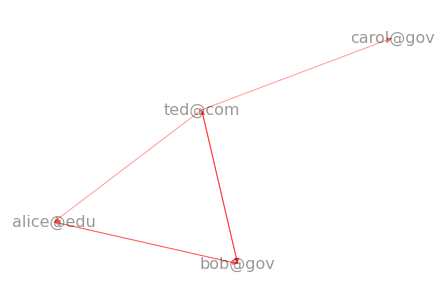

In [2]:
from email.utils import getaddresses, parseaddr
import mailbox

import matplotlib.pyplot as plt
import networkx as nx

# unix mailbox recipe
# see https://docs.python.org/3/library/mailbox.html


def mbox_graph():
    mbox = mailbox.mbox("unix_email.mbox")  # parse unix mailbox

    G = nx.MultiDiGraph()  # create empty graph

    # parse each messages and build graph
    for msg in mbox:  # msg is python email.Message.Message object
        (source_name, source_addr) = parseaddr(msg["From"])  # sender
        # get all recipients
        # see https://docs.python.org/3/library/email.html
        tos = msg.get_all("to", [])
        ccs = msg.get_all("cc", [])
        resent_tos = msg.get_all("resent-to", [])
        resent_ccs = msg.get_all("resent-cc", [])
        all_recipients = getaddresses(tos + ccs + resent_tos + resent_ccs)
        # now add the edges for this mail message
        for (target_name, target_addr) in all_recipients:
            G.add_edge(source_addr, target_addr, message=msg)

    return G


G = mbox_graph()

# print edges with message subject
for (u, v, d) in G.edges(data=True):
    print(f"From: {u} To: {v} Subject: {d['message']['Subject']}")

pos = nx.spring_layout(G, iterations=10, seed=227)
nx.draw(G, pos, node_size=0, alpha=0.4, edge_color="r", font_size=16, with_labels=True)
ax = plt.gca()
ax.margins(0.08)
plt.show()